<a href="https://colab.research.google.com/github/Frank-Chen515/BigData/blob/main/0330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("rJava")

In [ ]:
install.packages("jiebaR")

In [ ]:
install.packages("tmcn")

In [ ]:
install.packages("dplyr")

In [ ]:
install.packages("lubridate")

In [ ]:
install.packages("stringr")

In [ ]:
install.packages("wordcloud")

In [ ]:
install.packages("Rwordseg" , repos = "http://R-Forge.R-project.org")

In [ ]:
library(dplyr)
library(lubridate)
library(stringr)
library(jiebaR)
library(wordcloud)

In [4]:
content <- "嚴重特殊傳染性肺炎疫情持續在全球蔓延,已造成三千多萬人感染,死亡人數破百萬人,歐美醫療體系幾近崩潰,各種行動限制對於各國之經濟更有莫大之衝擊。
然而台灣未實行大規模封鎖行動,維持正常上班上課與各種經濟活動,至今無大規模疫情爆發,醫療體系也仍能正常提供民眾服務,顯示台灣的防疫政策正確而有效,
獲得世界各國高度肯定。國家衛生研究院群體健康科學研究所與感染症與疫苗研究所合作,利用真實數據與數學模型證實,良好的邊境管控,詳盡的疫情調查,
確實的隔離與檢疫,以及民眾遵行防疫措施,為台灣抗疫四大支柱。台灣也對世界各國提供各項協助與經驗分享,期望幫助各國盡快從疫情的陰霾中走出。"

In [14]:
cutter <- worker(bylines = F)

In [ ]:
cutter[content]

In [17]:
new_words <- c("傳染性肺炎" , "醫療體系" , "防疫措施")
for (i in 1:length(new_words)){
  new_user_word(cutter , new_words[i])
}

In [ ]:
content <- str_remove_all(content, "[0-9a-zA-Z]+?")
cutter[content]

In [ ]:
new_words < c("傳染性疾病" , "醫療體系" , "防疫措施")
writeLines(new_words, "new_words.txt")

stop_words <- c("在","之","更","個","未","而","也")
writeLines(stop_words, "stop_words.txt")


In [ ]:
cutter <- worker(user = "new_words.txt", stop_word = "stop_words.txt" , bylines = FALSE)
seg_words <- cutter[content]
seg_words

In [24]:
txt_freq <- freq(seg_words)

In [26]:
txt_freq <- arrange(txt_freq, desc(freq))

In [ ]:
head(txt_freq)

In [38]:
install.packages("showtext")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’




In [42]:
library(showtext)
showtext.auto(enable = TRUE)

'showtext.auto()' is now renamed to 'showtext_auto()'
The old version still works, but consider using the new function in future code



Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in strheight(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not found, will use 'sans' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in strheight(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not 

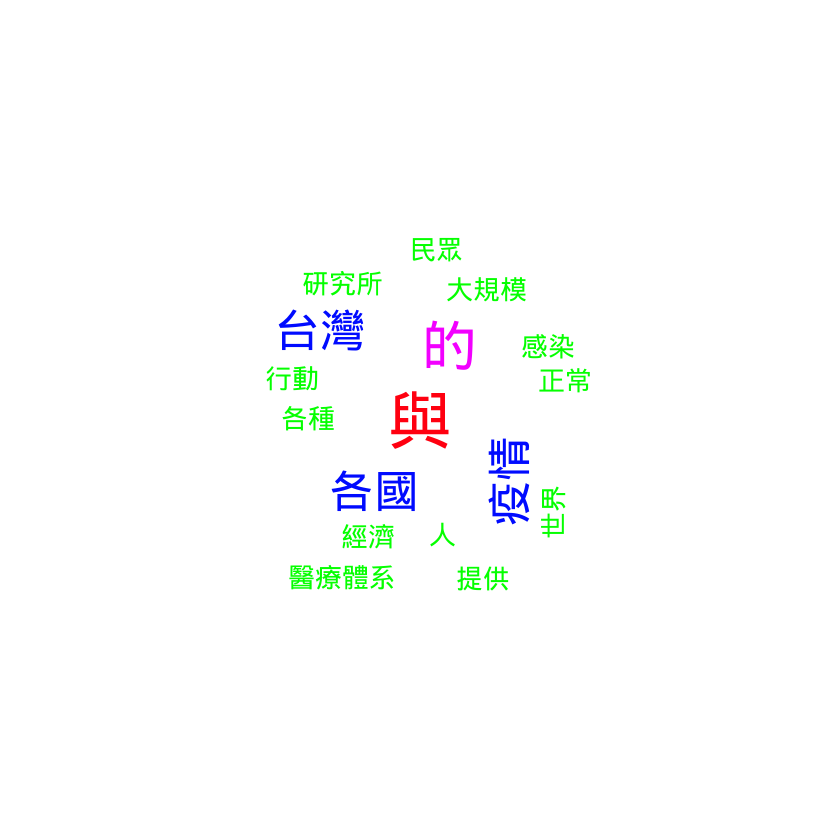

In [43]:
par(family=("Microsoft YaHei"))
wordcloud(txt_freq$char, txt_freq$freq, min.freq = 2, random.order = F,
ordered.colors = F, colors = rainbow(nrow(txt_freq)))